In [ ]:
import math
import numpy as np
import pandas as pd
import cvxpy as cvx
from cvxopt import matrix
from cvxopt.modeling import variable
from cvxopt.modeling import op

## Exercise 2: Hotel La Quinta Motor Inns (LQM)

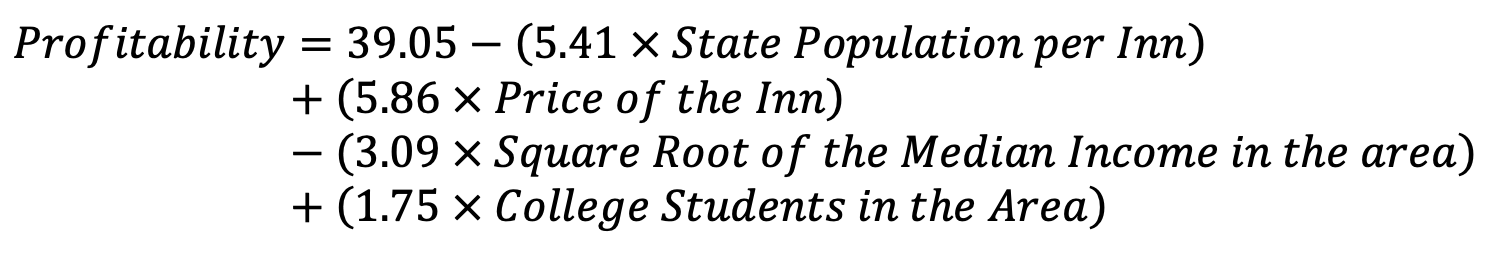

1. According to the regression equation given above, which variable positively affect Profitability? Which variable negatively affect Profitability? Does this intuitively make sense? Why?

> Based on the regression equation above, the variables 'Price of the Inn' and 'College Students in the Area' positively affect profitability and the variables 'State Population per Inn' and 'Square Root of the Median Income in the area' negatively affect profitability. 

> Intuitively, this makes sense as the price of the inn directly affects the profitability, i.e., higher prices mean higher profits. However, it is counterintuitive that a higher state population and median income would negatively affect profitability. One possible explanation could be that higher population and income levels could lead to higher competition and costs in the area, which could ultimately decrease profitability. Alternatively, it could be due to other factors not captured in the regression equation.

2. Using this regression equation, LQM created a spreadsheet model to predict profitability. LQM collected data for several locations in California, which is provided in the excel spreadsheet on Canvas “LQM”. Using this spreadsheet, compute the profitability for each hotel. Which one has the highest profitability? Which one has the lowest profitability?

In [ ]:
# read the data
LQM = pd.read_excel('LQM.xlsx')
LQM.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Hotel,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized)
0,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987
1,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279
2,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279
3,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279
4,5,"Fresno, California",325000,-1.037136,-0.408199,0.311669,-0.474279


In [ ]:
# compute the profitability
LQM['Profitability'] = 39.05 - 5.41 * LQM['State Population Per Inn (normalized)'] + 5.86 * LQM['Price (normalized)'] - 3.09 * LQM['Square Root of Median Income (normalized)'] + 1.75 * LQM['College Students in Area (normalized)']
LQM.sort_values('Profitability', ascending = False)

,Hotel,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized),Profitability
1,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192
5,6,"Long Beach, California",8950000,1.402123,0.657845,0.483711,-0.557278,49.095069
0,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369
2,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179
3,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858
13,14,"South Lake Tahoe, California",3750000,-0.068503,-0.791006,-0.594905,-0.426851,42.360966
11,12,"South Lake Tahoe, California",2500000,-0.422019,-0.791006,-0.594905,-0.426851,40.289363
12,13,"South Lake Tahoe, California",1975000,-0.570495,-0.791006,-0.594905,-0.426851,39.419290
9,10,"South Lake Tahoe, California",1650000,-0.662409,-0.791006,-0.594905,-0.426851,38.880673
14,15,"South Lake Tahoe, California",1475000,-0.711902,-0.791006,-0.594905,-0.426851,38.590649


3. LQM has a budget of $10 million to spend on hotels. Suppose we use a “greedy” approach where we select the most profitable hotels until we ran out of budget. So we would start by the most profitable, and then if we had enough budget left, we would buy the hotel we predict to be the second most profitable, and so on.
  

In [ ]:
greedy_df = LQM.sort_values('Profitability', ascending = False)
greedy_df['Cummulative Price'] = greedy_df['Price'].cumsum()
greedy_df['Cummulative Profitability'] = greedy_df['Profitability'].cumsum()
greedy_df

,Hotel,Location,Price,Price (normalized),Square Root of Median Income (normalized),College Students in Area (normalized),State Population Per Inn (normalized),Profitability,Cummulative Price,Cummulative Profitability
1,2,"Fresno, California",10000000,1.699076,-0.408199,0.311669,-0.474279,53.379192,10000000,53.379192
5,6,"Long Beach, California",8950000,1.402123,0.657845,0.483711,-0.557278,49.095069,18950000,102.474262
0,1,"Eureka, California",2925000,-0.301823,-0.812780,-0.536413,-0.995987,44.242369,21875000,146.716631
2,3,"Fresno, California",3750000,-0.068503,-0.408199,0.311669,-0.474279,43.021179,25625000,189.737810
3,4,"Fresno, California",3500000,-0.139206,-0.408199,0.311669,-0.474279,42.606858,29125000,232.344668
13,14,"South Lake Tahoe, California",3750000,-0.068503,-0.791006,-0.594905,-0.426851,42.360966,32875000,274.705634
11,12,"South Lake Tahoe, California",2500000,-0.422019,-0.791006,-0.594905,-0.426851,40.289363,35375000,314.994996
12,13,"South Lake Tahoe, California",1975000,-0.570495,-0.791006,-0.594905,-0.426851,39.419290,37350000,354.414286
9,10,"South Lake Tahoe, California",1650000,-0.662409,-0.791006,-0.594905,-0.426851,38.880673,39000000,393.294959
14,15,"South Lake Tahoe, California",1475000,-0.711902,-0.791006,-0.594905,-0.426851,38.590649,40475000,431.885608


4. Now, build an optimization model to select hotels given the $10 million budget.

a. Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.

b. What is the optimal solution? Give the values of the decision variables and the optimal objective function value.

c. Does the optimal solution make sense intuitively? How does it compared to the greedy solution?

**Decision variables:**

x: a binary variable indicating whether a hotel is selected (1) or not (0)

**Objective function:**

Maximize the total profitability, which is calculated as the dot product of the profitability vector and the decision variable vector (total_profit = profit_list × x).

**Constraints:**

- The total price of the selected hotels must be less than or equal to the budget of $10 million, which is expressed as (total_price = price_list × x <= budget) in the constraint definition.
- Each decision variable must be a binary value (x[i] == 0 or 1), which is implied by the boolean=True argument when defining the variable x.

In [ ]:
# definition of the variables
price_list = np.array(df.sort_values('Hotel')['Price'])
profit_list = np.array(df.sort_values('Hotel')['Profitability'])
x = cvx.Variable((16,1), boolean = True)

# definition of the constraints
budget = 10000000
total_price = price_list @ x 
con = [total_price <= budget]  

# # definition of the objective function
total_profit = profit_list @ x 
objective = cvx.Maximize(total_profit)

# solving the problem
prob = cvx.Problem(objective, con)
result = prob.solve()

print('The optimal profitability is: $', total_profit.value)
print('The total budget used is: $', total_price.value)
print('The optimal solution in purchasing the hotels:')
for i in range(16):
    if x[i].value == 1:
        hotel_num = LQM.iloc[i]['Hotel']
        hotel_location = LQM.iloc[i]['Location']
        print(f"- {hotel_num} {hotel_location}")

The optimal profitability is: $ [269.92468138]
The total budget used is: $ [9800000.]
The optimal solution in purchasing the hotels:
- 5 Fresno, California
- 10 South Lake Tahoe, California
- 11 South Lake Tahoe, California
- 12 South Lake Tahoe, California
- 13 South Lake Tahoe, California
- 15 South Lake Tahoe, California
- 16 South Lake Tahoe, California


5. LQM thinks that buying too many hotels in one city is probably not a good idea and would prefer to diversify across as many cities as possible. Add constraint(s) to your model to limit the number of hotels purchased in any city to at most 2.

a. What are the constraints that you need to add to the model? Intuitively, do you expect the new optimal objective function value to be larger, smaller or the same as before?

b. Write the new optimization model.

c. Solve the new model. Give the values of the decision variables and the optimal objective function value. How does this compare to the previous solution?

**Decision variables:**

x: a binary variable indicating whether a hotel is selected (1) or not (0)

**Objective function:**

Maximize the total profitability, which is calculated as the dot product of the profitability vector and the decision variable vector (total_profit = profit_list × x).

**Constraints:**

- The total price of the selected hotels must be less than or equal to the budget of $10 million, which is expressed as (total_price = price_list × x <= budget) in the constraint definition.

- Each decision variable must be a binary value (x[i] == 0 or 1), which is implied by the boolean=True argument when defining the variable x.

- The total number of hotels purchased cannot exceed 2, which is expressed as (total_purchase = sum(x) <= 2) in the constraint definition.

In [ ]:
# definition of the variables
price_list = np.array(LQM.sort_values('Hotel')['Price'])
profit_list = np.array(LQM.sort_values('Hotel')['Profitability'])
x = cvx.Variable((16, 1), boolean = True)

# definition of the constraints
budget = 10000000
total_price = price_list @ x 
total_purchase = sum(x)
con = [total_price <= budget, total_purchase <= 2]  

# definition of the objective function
total_profit = profit_list @ x 
objective = cvx.Maximize(total_profit)

# solving the problem
prob = cvx.Problem(objective, con)
result = prob.solve()

print('The optimal profitability is: $', total_profit.value)
print('The total budget used is: $', total_price.value)
print('The optimal solution in purchasing the hotels:')
for i in range(16):
    if x[i].value == 1:
        hotel_num = LQM.iloc[i]['Hotel']
        hotel_location = LQM.iloc[i]['Location']
        print(f"- {hotel_num} {hotel_location}")

The optimal profitability is: $ [87.26354773]
The total budget used is: $ [6675000.]
The optimal solution in purchasing the hotels:
- 1 Eureka, California
- 3 Fresno, California
